Домашнее задание
1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и
средней годовой смертностью?
    1. Построить точечный график
    2. Рассчитать коэффициенты корреляции Пирсона и Спирмена
    3. Построить модель линейной регрессии
    4. Рассчитать коэффициент детерминации
    5. Вывести график остатков
2. Сохраняется ли аналогичная зависимость для северных и южных городов
по отдельности?
    1. Разделить данные на 2 группы
    2. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('water.csv')

In [3]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


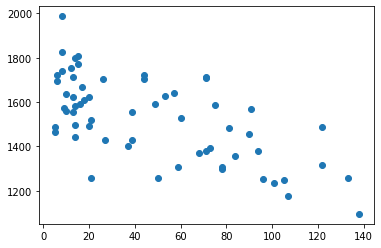

In [4]:
# строми график
plt.scatter(df.hardness, df.mortality)

In [5]:
# находим коэффициент корреляции Пирсона
df[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
# находим коэффициент корреляции Спирмена
df[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
x = df[['hardness']].values
y = df['mortality'].values

In [8]:
# строим модель линейной регрессии
model = LinearRegression()
model.fit(x, y)
model.score(x, y)

0.4288267193124974

In [9]:
model.coef_

array([-3.22609161])

In [10]:
model.intercept_

1676.3556007011584

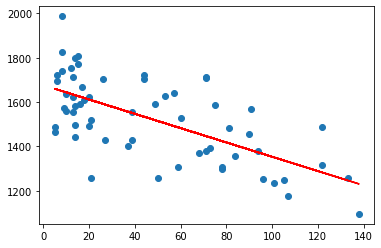

In [11]:
# выводим нашу модель регрессии на график
plt.scatter(df['hardness'], df['mortality'])

plt.plot(df['hardness'], model.predict(df[['hardness']]), c='r')

In [12]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [13]:
X = sm.add_constant(x)
Y = y

In [14]:
model_ = sm.OLS(Y, X)
results = model_.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           1.03e-08
Time:                        18:01:03   Log-Likelihood:                -388.28
No. Observations:                  61   AIC:                             780.6
Df Residuals:                      59   BIC:                             784.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.3556     29.298     57.217      0.0

In [15]:
# выводим коэффициент детерминации
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [1676.3556007    -3.22609161]
R2:  0.42882671931249716


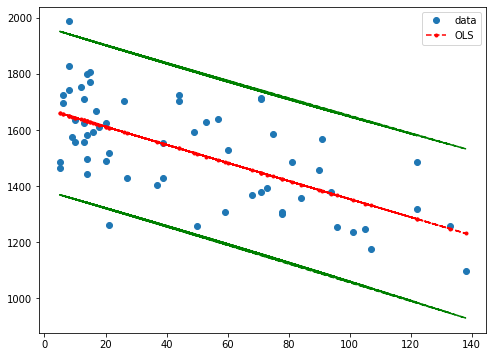

In [16]:
# строим график с диапазонами
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X[:,1], iv_u, 'g--')
ax.plot(X[:,1], iv_l, 'g--')
ax.legend(loc='best');

Text(0.5, 1.0, 'График остатков')

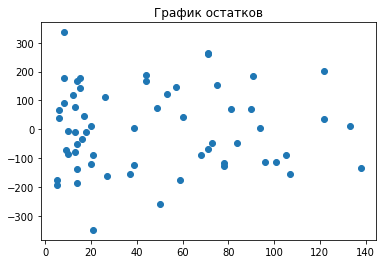

In [17]:
# выводим график остатков
plt.scatter(X[:, 1], results.resid)
plt.title('График остатков')

In [18]:
# повторяем все действия для группы южных городов
# для этого создаем отдельный дотафрейм 
south_df = df[df['location']== 'South']

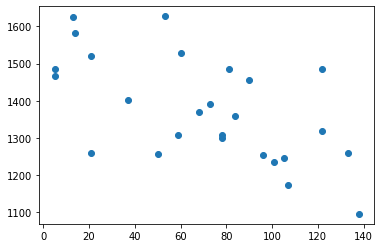

In [19]:
plt.scatter(south_df.hardness, south_df.mortality)

In [20]:
print('коэффициент Пирсона:')
print(south_df[['hardness','mortality']].corr())
print()
print('коэффициент Спирмена:')
print(south_df[['hardness','mortality']].corr(method='spearman'))

коэффициент Пирсона:
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000

коэффициент Спирмена:
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [21]:
south_x = south_df[['hardness']].values
south_y = south_df['mortality'].values
south_model = LinearRegression()
south_model.fit(south_x, south_y)
south_model.score(south_x, south_y)

0.3625885624364601

In [22]:
print(south_model.coef_)
print(south_model.intercept_)

[-2.09271845]
1522.8150485436895


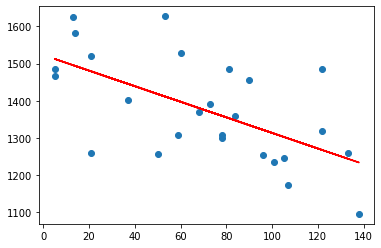

In [23]:
plt.scatter(south_df['hardness'], south_df['mortality'])

plt.plot(south_df['hardness'], south_model.predict(south_df[['hardness']]), c='r')

In [24]:
south_X = sm.add_constant(south_x)
south_Y = south_y
south_model_= sm.OLS(south_Y, south_X)
south_results = south_model_.fit()
print(south_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Tue, 27 Oct 2020   Prob (F-statistic):            0.00113
Time:                        18:01:04   Log-Likelihood:                -159.06
No. Observations:                  26   AIC:                             322.1
Df Residuals:                      24   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1522.8150     45.431     33.519      0.0

Parameters:  [1522.81504854   -2.09271845]
R2:  0.3625885624364602


Text(0.5, 1.0, 'График остатков')

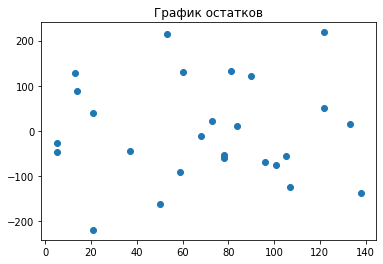

In [25]:
print('Parameters: ', south_results.params)
print('R2: ', south_results.rsquared)
plt.scatter(south_X[:, 1], south_results.resid)
plt.title('График остатков')

In [26]:
# повторяем все действия для группы северных городов
# для этого создаем отдельный дотафрейм 
north_df = df[df['location']== 'North']

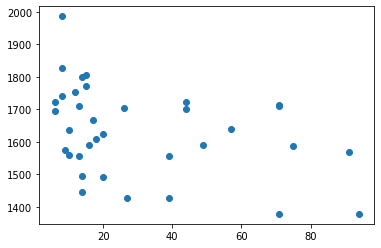

In [27]:
plt.scatter(north_df.hardness, north_df.mortality)

In [28]:
print('коэффициент Пирсона:')
print(north_df[['hardness','mortality']].corr())
print()
print('коэффициент Спирмена:')
print(north_df[['hardness','mortality']].corr(method='spearman'))

коэффициент Пирсона:
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000

коэффициент Спирмена:
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


In [29]:
north_x = north_df[['hardness']].values
north_y = north_df['mortality'].values
north_model = LinearRegression()
north_model.fit(north_x, north_y)
north_model.score(north_x, north_y)

0.1358643664207173

In [30]:
print(north_model.coef_)
print(north_model.intercept_)

[-1.93134215]
1692.312801433099


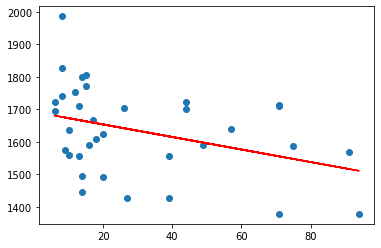

In [31]:
plt.scatter(north_df['hardness'], north_df['mortality'])

plt.plot(north_df['hardness'], north_model.predict(north_df[['hardness']]), c='r')

In [32]:
north_X = sm.add_constant(north_x)
north_Y = north_y
north_model_= sm.OLS(north_Y, north_X)
north_results = north_model_.fit()
print(north_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Tue, 27 Oct 2020   Prob (F-statistic):             0.0293
Time:                        18:01:05   Log-Likelihood:                -218.78
No. Observations:                  35   AIC:                             441.6
Df Residuals:                      33   BIC:                             444.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1692.3128     33.785     50.091      0.0

Parameters:  [1692.31280143   -1.93134215]
R2:  0.13586436642071753


Text(0.5, 1.0, 'График остатков')

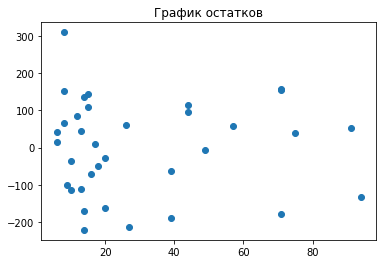

In [33]:
print('Parameters: ', north_results.params)
print('R2: ', north_results.rsquared)
plt.scatter(north_X[:, 1], north_results.resid)
plt.title('График остатков')